In [121]:
#from sunpy.net import hek
#from sunpy.net import hek2vso
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib qt
import shapely
from shapely.wkt import dumps, loads
import numpy as np
import pandas as pd
from shapely.geometry.polygon import LinearRing, Polygon
from datetime import timedelta
import datetime
#from sunpy.time import *
from dateutil.parser import parse
import matplotlib.cm as cm
import matplotlib as mpl
from operator import itemgetter
from itertools import groupby
import itertools
import operator
from datetime import timedelta
import csv
import dateutil
import time 
import scipy.stats as stats

# GET THE GOOD TRACKS FOR 2012
These are the ones that Ashna hand checked and determined were good

In [122]:
#TODO:It appears Ashna only used half of the track length to do her calculations
#You should probably do the same thing for consistency. Use only the first half of the filaments in each track.
url = '/Users/nschanch/Desktop/Filament_tracking/Transit_tracks2012.csv'
track_files = pd.read_csv(url, header=2)
good_tracks_trans_2012 = track_files['Track No. '].astype(float)
good_tracks_trans_2012.head()
#track_files.keys()

0     64
1     78
2     98
3    106
4    135
Name: Track No. , dtype: float64

In [123]:
fi_tracked2012 = pd.read_csv('/Users/nschanch/Desktop/Filament_tracking/FIDustinTracked_2012.txt',delimiter='\t')   ##working with filament data 
print len(fi_tracked2012)
fi_tracked2012['temp_index'] = fi_tracked2012.index
fi_tracked2012.head()

8541


,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,frm_specificid,fi_length,fi_lengthunit,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality,Unnamed: 18,temp_index
0,1,2012-01-01 08:15:04,NaN,FI,POINT(702.26001 351.130005),"POLYGON((680.125244 319.940399,733.44873 319.9...","POLYGON((694.210022 330,696.219971 332.01001,6...",POINT(49.4615746 19.1164284),"POLYGON((46.6578178 17.0551929,51.7592659 17.2...","POLYGON((48.1759834 17.7414703,48.4115486 17.8...",NaN,3300620030,cm,70.01800,0,0,0,0,NaN,0
1,2,2012-01-01 08:15:04,2012-01-02 08:04:55,FI,POINT(-335.032013 423.569),"POLYGON((-430.612488 377.288696,-243.477493 37...","POLYGON((-256.559998 387.350006,-253.539993 38...",POINT(-21.7999401 22.8660946),"POLYGON((-27.9167461 20.0360699,-15.319437 19....","POLYGON((-16.2346992 20.4350452,-16.0449734 20...",NaN,12771947500,cm,-6.07875,1,1,0,0,NaN,1
2,2,2012-01-02 08:04:55,2012-01-03 18:27:22,FI,POINT(-219.332993 427.597992),"POLYGON((-250.522644 408.48175,-186.131348 408...","POLYGON((-209.270004 418.540009,-206.25 419.54...",POINT(-14.069787 22.8834229),"POLYGON((-15.9787512 21.6737385,-11.7960272 21...","POLYGON((-13.3522606 22.2853928,-13.1621113 22...",NaN,3372370430,cm,-16.45300,0,0,0,0,NaN,2
3,2,2012-01-03 18:27:22,2012-01-04 08:49:18,FI,POINT(155.949005 425.589996),"POLYGON((26.1595001 361.198059,265.616486 361....","POLYGON((255.559998 371.26001,255.559998 374.2...",POINT(9.92746639 22.5396767),"POLYGON((1.61245799 18.3713264,16.6190376 18.5...","POLYGON((16.033884 19.1389103,16.0532074 19.33...",NaN,17364156400,cm,-14.10050,6,4,1,-1,NaN,3
4,2,2012-01-04 08:49:18,2012-01-04 18:11:55,FI,POINT(243.481995 430.621002),"POLYGON((205.249344 410.498749,280.708649 410....","POLYGON((221.350006 420.559998,224.369995 421....",POINT(15.6561918 22.8781376),"POLYGON((13.0203381 21.5327492,17.9587288 21.6...","POLYGON((14.1297235 22.1995487,14.3338509 22.2...",NaN,4018147330,cm,-1.30679,1,0,1,0,NaN,4


In [124]:
#print(groups.apply(lambda g: g[g['B'] == g['B'].max()]))
#print len(good_tracks2012)
#good_tracks2012.head()
#good_tracks2012['index_test'] = good_tracks2012.index

grouped = fi_tracked2012.groupby('Track No.')
bad = []
for i, group in grouped:
    bad.append(group.index.max())
    #print max(grouped['HEK_time'])
print len(bad)

#print good_tracks2012[good_tracks2012.index == 6073]
#print bad
#good_tracks2012.drop(good_tracks2012.index[[1,2,3,4]])
#print bad
#print good_tracks2012[good_tracks2012.index == 4]
#for i in bad:
#    good_tracks2012 = fi_tracked2012[fi_tracked2012['index_test'] != i]
good_tracks2012 = fi_tracked2012.drop(fi_tracked2012.index[[bad]])
grouped = good_tracks2012.groupby('Track No.')
#for i, group in grouped: 
#    print len(group)
#lengths = 7,5,4,6
good_tracks2012 = good_tracks2012.groupby('Track No.').filter(lambda x: len(x['Track No.']) >= 3, dropna=True)
good_tracks2012[0:8]

3017


,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,frm_specificid,fi_length,fi_lengthunit,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality,Unnamed: 18,temp_index
1,2,2012-01-01 08:15:04,2012-01-02 08:04:55,FI,POINT(-335.032013 423.569),"POLYGON((-430.612488 377.288696,-243.477493 37...","POLYGON((-256.559998 387.350006,-253.539993 38...",POINT(-21.7999401 22.8660946),"POLYGON((-27.9167461 20.0360699,-15.319437 19....","POLYGON((-16.2346992 20.4350452,-16.0449734 20...",NaN,12771947500,cm,-6.07875,1,1,0,0,NaN,1
2,2,2012-01-02 08:04:55,2012-01-03 18:27:22,FI,POINT(-219.332993 427.597992),"POLYGON((-250.522644 408.48175,-186.131348 408...","POLYGON((-209.270004 418.540009,-206.25 419.54...",POINT(-14.069787 22.8834229),"POLYGON((-15.9787512 21.6737385,-11.7960272 21...","POLYGON((-13.3522606 22.2853928,-13.1621113 22...",NaN,3372370430,cm,-16.45300,0,0,0,0,NaN,2
3,2,2012-01-03 18:27:22,2012-01-04 08:49:18,FI,POINT(155.949005 425.589996),"POLYGON((26.1595001 361.198059,265.616486 361....","POLYGON((255.559998 371.26001,255.559998 374.2...",POINT(9.92746639 22.5396767),"POLYGON((1.61245799 18.3713264,16.6190376 18.5...","POLYGON((16.033884 19.1389103,16.0532074 19.33...",NaN,17364156400,cm,-14.10050,6,4,1,-1,NaN,3
4,2,2012-01-04 08:49:18,2012-01-04 18:11:55,FI,POINT(243.481995 430.621002),"POLYGON((205.249344 410.498749,280.708649 410....","POLYGON((221.350006 420.559998,224.369995 421....",POINT(15.6561918 22.8781376),"POLYGON((13.0203381 21.5327492,17.9587288 21.6...","POLYGON((14.1297235 22.1995487,14.3338509 22.2...",NaN,4018147330,cm,-1.30679,1,0,1,0,NaN,4
5,2,2012-01-04 18:11:55,2012-01-05 18:32:45,FI,POINT(315.923004 428.609009),"POLYGON((249.518997 406.474457,383.333008 406....","POLYGON((289.76001 416.540009,292.779999 416.5...",POINT(20.4865532 22.7980022),"POLYGON((15.8678551 21.2744179,24.8799019 21.4...","POLYGON((18.6076145 21.9748726,18.8094444 21.9...",NaN,8323324900,cm,-3.15932,1,1,0,0,NaN,5
6,2,2012-01-05 18:32:45,2012-01-06 18:05:45,FI,POINT(500.037994 429.609985),"POLYGON((411.5 392.384552,589.58197 392.384552...","POLYGON((573.47998 402.450012,576.5 403.450012...",POINT(33.755497 23.146452),"POLYGON((26.6640892 20.5120583,40.1942635 20.9...","POLYGON((39.0721283 21.5900021,39.3427124 21.6...",NaN,12126198800,cm,-7.45655,3,2,1,0,NaN,6
9,4,2012-01-01 08:15:04,2012-01-02 08:04:55,FI,POINT(-609.697998 472.868011),"POLYGON((-656.984985 436.648254,-542.289001 43...","POLYGON((-564.419983 446.709991,-561.409973 44...",POINT(-44.2945633 26.7950439),"POLYGON((-47.5955811 24.5251293,-37.3977356 24...","POLYGON((-39.4872627 24.8781204,-39.2833519 25...",NaN,8825558000,cm,-39.23100,2,1,0,0,NaN,9
10,4,2012-01-02 08:04:55,2012-01-03 18:27:22,FI,POINT(-500.037994 532.234009),"POLYGON((-526.196899 479.915497,-456.775085 47...","POLYGON((-501.040009 489.980011,-498.029999 49...",POINT(-36.3746223 30.4787903),"POLYGON((-37.0945702 26.9155674,-31.5064278 26...","POLYGON((-35.2718735 27.5330505,-35.0505943 27...",NaN,7605748700,cm,-81.34190,1,1,0,-1,NaN,10


In [125]:
###selects the data of interest by csv track numbers 


working_data_2012_trans= good_tracks2012[good_tracks2012['Track No.'].isin(good_tracks_trans_2012)]
working_data_2012_trans.head()


,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,frm_specificid,fi_length,fi_lengthunit,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality,Unnamed: 18,temp_index
149,64,2012-01-06 18:05:45,2012-01-07 09:33:12,FI,POINT(-879.333984 299.819),"POLYGON((-926.620972 158.964996,-792.809021 15...","POLYGON((-895.429993 169.029999,-893.419983 17...",POINT(-70.026062 16.6761971),"POLYGON((-73.5585556 8.36423206,-54.8212471 7....","POLYGON((-67.9817734 8.62738228,-67.724762 8.7...",NaN,19229714400,cm,70.7404,3,1,2,0,NaN,149
150,64,2012-01-07 09:33:12,2012-01-08 08:28:28,FI,POINT(-809.905029 300.821991),"POLYGON((-854.172974 142.865005,-704.265015 14...","POLYGON((-823.98999 152.929993,-820.969971 152...",POINT(-59.586792 16.0898895),"POLYGON((-61.627533 6.66912889,-46.3526535 5.8...","POLYGON((-58.1349831 7.06986094,-57.7928276 7....",NaN,22673801200,cm,76.3383,6,3,1,-1,NaN,150
151,64,2012-01-08 08:28:28,2012-01-09 11:08:54,FI,POINT(-649.929016 324.964996),"POLYGON((-704.257996 176.064499,-553.346008 17...","POLYGON((-681.119995 186.130005,-678.099976 18...",POINT(-43.9116859 16.6940193),"POLYGON((-46.5964088 7.778368,-34.736145 7.258...","POLYGON((-44.7061501 8.28779984,-44.4526978 8....",NaN,21741021200,cm,67.0859,3,1,1,0,NaN,151
152,64,2012-01-09 11:08:54,2012-01-10 18:23:00,FI,POINT(-455.740997 328.979004),"POLYGON((-491.959015 194.167496,-369.221008 19...","POLYGON((-460.769989 204.229996,-457.75 206.24...",POINT(-29.0017738 16.2307987),"POLYGON((-30.4968433 8.07977962,-22.3664532 7....","POLYGON((-28.4197483 8.61031342,-28.2258797 8....",NaN,18870927400,cm,73.8154,2,1,0,-1,NaN,152
153,64,2012-01-10 18:23:00,2012-01-11 11:28:18,FI,POINT(125.750999 465.78299),"POLYGON((48.2885017 371.217987,161.967499 371....","POLYGON((147.880005 381.279999,150.899994 383....",POINT(8.10672092 24.4009399),"POLYGON((2.97542095 18.2334518,10.0307789 18.2...","POLYGON((9.18464661 18.9203701,9.38134956 19.0...",NaN,12987221000,cm,-53.1533,4,1,2,0,NaN,153


# SPLIT BETWEEN NORTH AND SOUTH 

In [126]:
xvals = [loads(elem).x for elem in working_data_2012_trans['HPC_Center']]
working_data_2012_trans['xcen'] = xvals
#print len(working_data_2012_trans)
yvals = [loads(elem).y for elem in working_data_2012_trans['HPC_Center']]
working_data_2012_trans['ycen'] = yvals 


#The AVERAGE y value in the track is in the north. 
#There are a few cases where the filament track has values in both the north and south
north_filaments_2012 = working_data_2012_trans.groupby("Track No.").filter(lambda x: (x['ycen']).mean() > 0)
south_filaments_2012 = working_data_2012_trans.groupby("Track No.").filter(lambda x: (x['ycen']).mean() <= 0)


#Now group everything by its track number
south_groups_2012 = south_filaments_2012.groupby("Track No.")
north_groups_2012 = north_filaments_2012.groupby("Track No.")


#Get the unique track numbers for each hemisphere
north_trx_2012_trans=north_groups_2012['Track No.']
south_trx_2012_trans=south_groups_2012['Track No.']


/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# FIND THE AREA OF THE POLYGONS

In [127]:
#Find the L to W using the bounding box rectangle.
rec_2012 = working_data_2012_trans['HPC_BB_Rec']
L_to_W_2012 = []


for item in rec_2012:
    rec = loads(item) #loading each polygon
    #the bounds gives [xmin, ymin, xmax, ymax]
    L_to_W_2012.append((rec.bounds[2]-rec.bounds[0])/ (rec.bounds[3]-rec.bounds[1]))
    
working_data_2012_trans['L_to_W'] = L_to_W_2012
working_data_2012_trans.tail()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,...,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality,Unnamed: 18,temp_index,xcen,ycen,L_to_W
8404,2946,2012-12-22 09:19:23,2012-12-23 11:10:35,FI,POINT(-427.445007 686.929016),"POLYGON((-468.681091 641.67041,-372.128906 641...","POLYGON((-452.589996 651.72998,-449.570007 651...",POINT(-36.8331985 43.1610184),"POLYGON((-38.4578514 39.5693741,-29.4952602 39...","POLYGON((-37.3966942 40.3336983,-37.1002617 40...",...,23.8358,5,5,0,-1,NaN,8404,-427.445007,686.929016,1.411764
8405,2946,2012-12-23 11:10:35,2012-12-24 09:12:12,FI,POINT(-304.761993 662.83197),"POLYGON((-343.988861 632.657532,-266.541138 63...","POLYGON((-324.880005 642.719971,-321.859985 64...",POINT(-24.3244343 40.8439331),"POLYGON((-26.7114239 38.5181198,-20.3501186 38...","POLYGON((-25.4090004 39.2751541,-25.1544304 39...",...,22.1944,4,0,2,1,NaN,8405,-304.761993,662.831970,1.283332
8406,2946,2012-12-24 09:12:12,2012-12-25 10:47:50,FI,POINT(-157.921005 676.947998),"POLYGON((-199.161346 640.736816,-114.668648 64...","POLYGON((-183.070007 650.799988,-183.070007 65...",POINT(-12.4905643 41.7216072),"POLYGON((-15.1563158 38.8698769,-8.65027523 38...","POLYGON((-14.0640945 39.645134,-14.1139297 39....",...,42.2767,2,1,1,0,NaN,8406,-157.921005,676.947998,1.166666
8407,2946,2012-12-25 10:47:50,2012-12-27 09:26:50,FI,POINT(178.046997 698.106995),"POLYGON((115.68 644.792664,240.414001 644.7926...","POLYGON((131.779999 654.849976,134.789993 656....",POINT(14.4978552 43.3598671),"POLYGON((8.74971199 38.998867,18.4597893 39.09...","POLYGON((10.0959892 39.7984924,10.3537769 39.9...",...,46.5140,3,1,2,0,NaN,8407,178.046997,698.106995,1.409094
8408,2946,2012-12-27 09:26:50,2012-12-28 09:50:10,FI,POINT(438.615997 688.104004),"POLYGON((400.388 639.815979,483.885986 639.815...","POLYGON((415.480011 649.880005,418.5 650.88000...",POINT(37.6820984 42.7856445),"POLYGON((31.6620159 38.7524681,39.533493 38.97...","POLYGON((33.4518585 39.5851517,33.7763596 39.6...",...,51.6400,1,0,1,0,NaN,8408,438.615997,688.104004,0.965116


In [128]:
poly_2012 = working_data_2012_trans['HPC_BB_Poly']
area_data_2012 = []


for item in poly_2012:
    poly = loads(item) #loading each polygon
    tot_area = poly.area
    area_data_2012.append(tot_area)
    
working_data_2012_trans['area'] = area_data_2012

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [129]:
#all_tracks_trans=[]
#length_2012=working_data_2012_trans['fi_length']
#time_2012=working_data_2012_trans['HEK_time']
#track_2012=working_data_2012_trans['Track No.']
#chiral_2012= working_data_2012_trans['fi_chirality']
#tilt_2012 = working_data_2012_trans['fi_tilt']
#plot_length_data_2012_trans=zip(track_2012, time_2012, length_2012, chiral_2012, tilt_2012, area_data_2012)

#track number, track time, length, chirality
#all_data_trans=plot_length_data_2012_trans+plot_length_data_2013_trans
#all_north_trans = list(set(north_trx_2012_trans) | set(norm_north_track_2013) )
#all_south_trans = list(set(south_trx_2012_trans) | set(norm_south_track_2013) )
#for element in all_data_trans:
#    all_tracks_trans.append(element[0])
    
all_tracks_trans = working_data_2012_trans[['Track No.','fi_length','HEK_time','fi_chirality','fi_tilt','area','fi_barbstot','xcen','ycen','L_to_W']]
print len(all_tracks_trans)
all_tracks_trans.head()

678


,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W
149,64,19229714400,2012-01-06 18:05:45,0,70.7404,7662.162092,3,-879.333984,299.819000,0.517512
150,64,22673801200,2012-01-07 09:33:12,-1,76.3383,5797.861380,6,-809.905029,300.821991,0.522808
151,64,21741021200,2012-01-08 08:28:28,0,67.0859,6053.765348,3,-649.929016,324.964996,0.547443
152,64,18870927400,2012-01-09 11:08:54,-1,73.8154,4029.099151,2,-455.740997,328.979004,0.495933
153,64,12987221000,2012-01-10 18:23:00,0,-53.1533,954.909216,4,125.750999,465.782990,0.706247


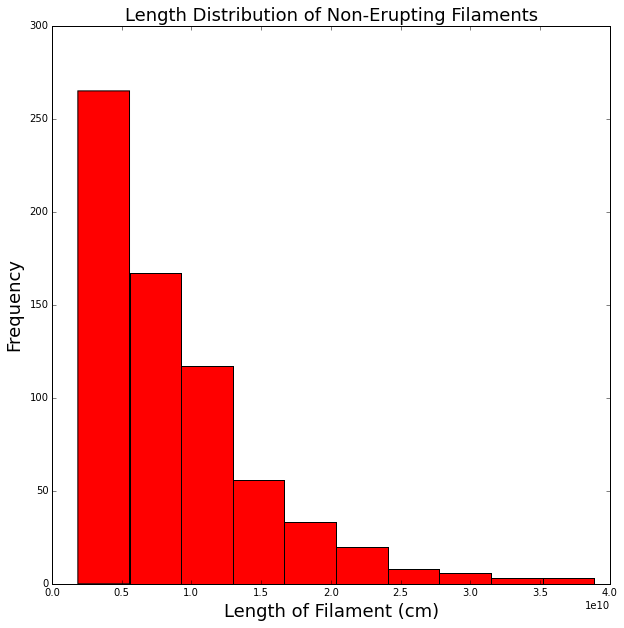

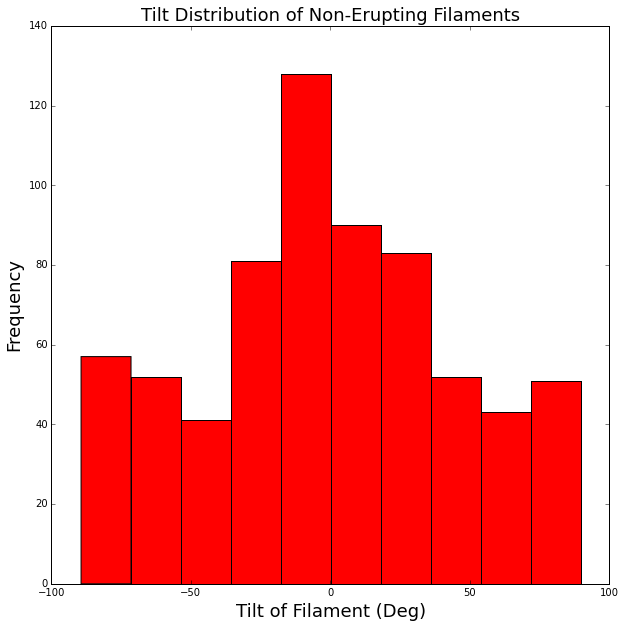

In [130]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.ylabel('Number of Non-Erupting Filaments',fontsize=18)
plt.xlabel('Length of Filament (cm)',fontsize=18)
all_tracks_trans['fi_length'].plot(kind='hist', rwidth=1.5, color = 'r')
plt.title('Length Distribution of Non-Erupting Filaments',fontsize=18)


    
plt.figure(figsize=(10,10))
plt.grid(True)
plt.ylabel('Number of Non-Erupting Filaments',fontsize=18)
plt.xlabel('Tilt of Filament (Deg)',fontsize=18)
all_tracks_trans['fi_tilt'].plot(kind='hist', rwidth=1.5, color = 'r')
plt.title('Tilt Distribution of Non-Erupting Filaments',fontsize=18)





In [131]:
#I am going to try my own method to find the slope of the length
#print len(all_tracks_trans)
grouped_filaments = all_tracks_trans.groupby('Track No.')
stuff = 0
time_delta = []

for name, group in grouped_filaments:
    #print name
    
    t = group['HEK_time']
    
    time = [pd.to_datetime(date) for date in t]
    t0 = time[0]
    for i in range(len(time)):
        t1 = time[i]
        time_delta.append(timedelta.total_seconds(t1 - t0))
        
#print time_delta       
print len(all_tracks_trans)
print len(time_delta)
all_tracks_trans['time_delta'] = time_delta
all_tracks_trans.head()

678
678


/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,time_delta
149,64,19229714400,2012-01-06 18:05:45,0,70.7404,7662.162092,3,-879.333984,299.819000,0.517512,0
150,64,22673801200,2012-01-07 09:33:12,-1,76.3383,5797.861380,6,-809.905029,300.821991,0.522808,55647
151,64,21741021200,2012-01-08 08:28:28,0,67.0859,6053.765348,3,-649.929016,324.964996,0.547443,138163
152,64,18870927400,2012-01-09 11:08:54,-1,73.8154,4029.099151,2,-455.740997,328.979004,0.495933,234189
153,64,12987221000,2012-01-10 18:23:00,0,-53.1533,954.909216,4,125.750999,465.782990,0.706247,346635


In [132]:
def plot_slopes(x,y,m,b,title,ytitle):
    line = [m*each+b for each in x] #Calculate the line points (y =mx+b)
    
    plt.plot(x, y, color='red', linestyle='-')
    plt.plot(x, line, '-.', color='blue')   ##plots the line fit
    #plt.title('Filament length (Track) of Non-Erupting Filament')
    plt.title(title)
    plt.grid(True)
    fig1 = plt.gcf()
    fig1.set_size_inches(10.5,10.5)
    plt.xlabel('Filament Track time')
    plt.ylabel(ytitle)
    #plt.ylabel('Filament length (cm)')
    plt.xticks( rotation= 80 )
    #plt.show()

# Find the change in Length for each filament

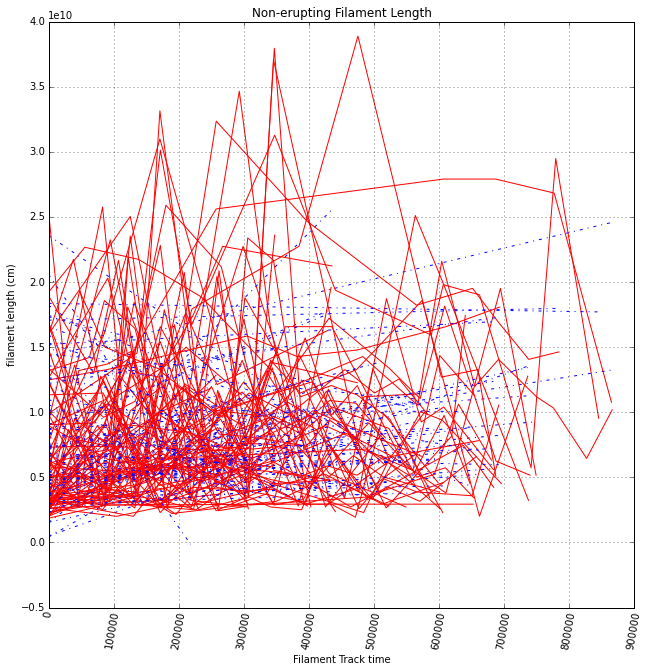

In [133]:
grouped_filaments = all_tracks_trans.groupby('Track No.')
len_slopes = []
avg_len = []
len_stdev = []
len_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_len = group['fi_length']
    fit = np.polyfit(t_delt, f_len,1)
    len_slopes = len_slopes + [fit]*len(f_len) 
    avg_len.extend([f_len.mean()]*len(f_len))
    len_stdev.extend([np.std(f_len)]*len(f_len))
    len_skew.extend([stats.skew(f_len)]*len(f_len))
    plot_slopes(t_delt,f_len,fit[0],fit[1],'Non-erupting Filament Length','filament length (cm)')


In [134]:
len_slopes_only = [item[0] for item in len_slopes]

all_tracks_trans['len_fits'] = len_slopes
all_tracks_trans['len_slope'] = len_slopes_only
all_tracks_trans['avg_len'] = avg_len
all_tracks_trans['len_stdev'] = len_stdev
all_tracks_trans['len_skew'] = len_skew
all_tracks_trans.head()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,time_delta,len_fits,len_slope,avg_len,len_stdev,len_skew
149,64,19229714400,2012-01-06 18:05:45,0,70.7404,7662.162092,3,-879.333984,299.819000,0.517512,0,"[-34138.1659742, 23579594553.0]",-34138.165974,1.684990e+10,5.904006e+09,-0.928417
150,64,22673801200,2012-01-07 09:33:12,-1,76.3383,5797.861380,6,-809.905029,300.821991,0.522808,55647,"[-34138.1659742, 23579594553.0]",-34138.165974,1.684990e+10,5.904006e+09,-0.928417
151,64,21741021200,2012-01-08 08:28:28,0,67.0859,6053.765348,3,-649.929016,324.964996,0.547443,138163,"[-34138.1659742, 23579594553.0]",-34138.165974,1.684990e+10,5.904006e+09,-0.928417
152,64,18870927400,2012-01-09 11:08:54,-1,73.8154,4029.099151,2,-455.740997,328.979004,0.495933,234189,"[-34138.1659742, 23579594553.0]",-34138.165974,1.684990e+10,5.904006e+09,-0.928417
153,64,12987221000,2012-01-10 18:23:00,0,-53.1533,954.909216,4,125.750999,465.782990,0.706247,346635,"[-34138.1659742, 23579594553.0]",-34138.165974,1.684990e+10,5.904006e+09,-0.928417


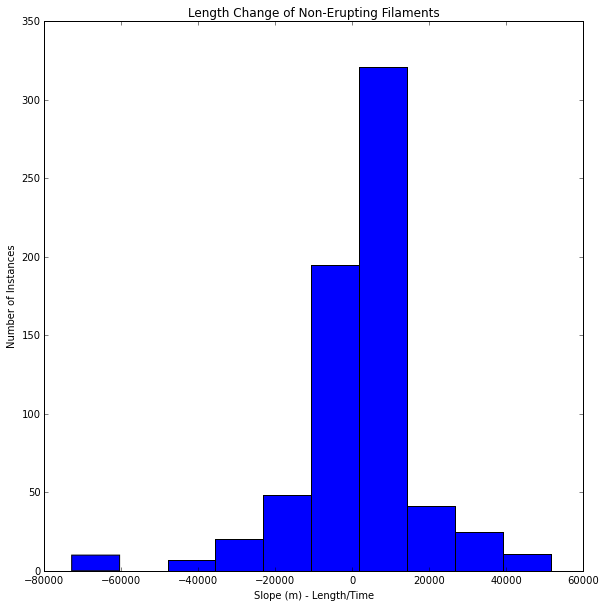

In [135]:
n_groups=5

plt.xlabel('Slope (m) - Length/Time')
plt.ylabel('Number of Instances')
plt.title('Length Change of Non-Erupting Filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.hist(len_slopes_only)
plt.tight_layout()
plt.show()

#Find the Change in Area for each Filament

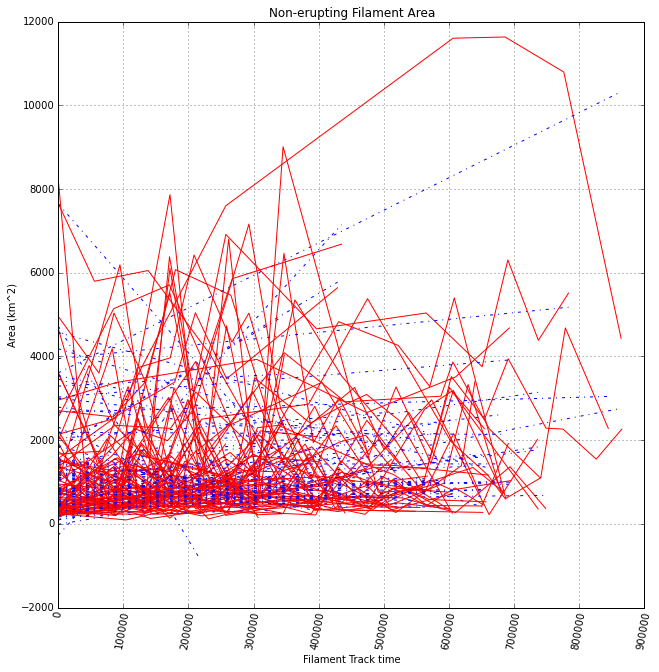

In [136]:
grouped_filaments = all_tracks_trans.groupby('Track No.')
area_slopes = []
avg_area = []
area_stdev = []
area_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_area = group['area']
    fit = np.polyfit(t_delt, f_area,1)
    area_slopes = area_slopes + [fit]*len(f_area) 
    avg_area.extend([f_area.mean()]*len(f_area))
    area_stdev.extend([np.std(f_area)]*len(f_area))
    area_skew.extend([stats.skew(f_area)]*len(f_area))
    plot_slopes(t_delt,f_area,fit[0],fit[1],'Non-erupting Filament Area', 'Area (km^2)')

In [137]:
area_slopes_only = [item[0] for item in area_slopes]
all_tracks_trans['avg_area'] = avg_area
all_tracks_trans['area_fits'] = area_slopes
all_tracks_trans['area_slope'] = area_slopes_only
all_tracks_trans['area_stdev'] = area_stdev
all_tracks_trans['area_skew'] = area_skew
all_tracks_trans.head()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,len_fits,len_slope,avg_len,len_stdev,len_skew,avg_area,area_fits,area_slope,area_stdev,area_skew
149,64,19229714400,2012-01-06 18:05:45,0,70.7404,7662.162092,3,-879.333984,299.819000,0.517512,...,"[-34138.1659742, 23579594553.0]",-34138.165974,1.684990e+10,5.904006e+09,-0.928417,4137.033154,"[-0.017817908986, 7649.49833985]",-0.017818,2693.587062,-0.274744
150,64,22673801200,2012-01-07 09:33:12,-1,76.3383,5797.861380,6,-809.905029,300.821991,0.522808,...,"[-34138.1659742, 23579594553.0]",-34138.165974,1.684990e+10,5.904006e+09,-0.928417,4137.033154,"[-0.017817908986, 7649.49833985]",-0.017818,2693.587062,-0.274744
151,64,21741021200,2012-01-08 08:28:28,0,67.0859,6053.765348,3,-649.929016,324.964996,0.547443,...,"[-34138.1659742, 23579594553.0]",-34138.165974,1.684990e+10,5.904006e+09,-0.928417,4137.033154,"[-0.017817908986, 7649.49833985]",-0.017818,2693.587062,-0.274744
152,64,18870927400,2012-01-09 11:08:54,-1,73.8154,4029.099151,2,-455.740997,328.979004,0.495933,...,"[-34138.1659742, 23579594553.0]",-34138.165974,1.684990e+10,5.904006e+09,-0.928417,4137.033154,"[-0.017817908986, 7649.49833985]",-0.017818,2693.587062,-0.274744
153,64,12987221000,2012-01-10 18:23:00,0,-53.1533,954.909216,4,125.750999,465.782990,0.706247,...,"[-34138.1659742, 23579594553.0]",-34138.165974,1.684990e+10,5.904006e+09,-0.928417,4137.033154,"[-0.017817908986, 7649.49833985]",-0.017818,2693.587062,-0.274744


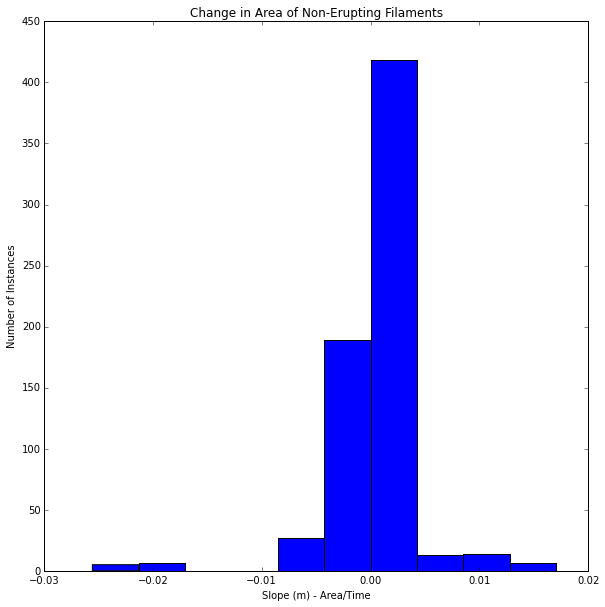

In [138]:
plt.xlabel('Slope (m) - Area/Time')
plt.ylabel('Number of Instances')
plt.title('Change in Area of Non-Erupting Filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.hist(area_slopes_only)
plt.tight_layout()
plt.show()

In [139]:
print min(all_tracks_trans['fi_length'])

1865565310


#Find the length-to-width ratio

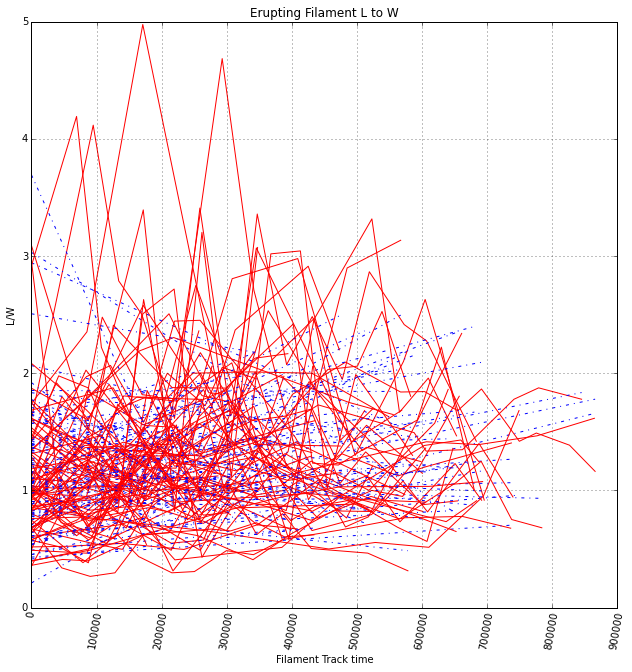

In [140]:
#The format of how I find the slope for each feature is the same
grouped_filaments = all_tracks_trans.groupby('Track No.')
size_ratio_slopes = []
avg_size_ratio = []
size_ratio_stdev = []
size_ratio_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_size_ratio = group['L_to_W']
    fit = np.polyfit(t_delt, f_size_ratio,1)
    size_ratio_slopes = size_ratio_slopes + [fit]*len(f_size_ratio) 
    avg_size_ratio.extend([f_size_ratio.mean()]*len(f_size_ratio))
    size_ratio_stdev.extend([np.std(f_size_ratio)]*len(f_size_ratio))
    size_ratio_skew.extend([stats.skew(f_size_ratio)]*len(f_size_ratio))
    plot_slopes(t_delt,f_size_ratio,fit[0],fit[1],'Erupting Filament L to W', 'L/W')

In [141]:
#Add the area information to the dataframe
size_ratio_slopes_only = [item[0] for item in size_ratio_slopes]
all_tracks_trans['avg_L_to_W'] = avg_size_ratio
all_tracks_trans['L_to_W_slope'] = size_ratio_slopes_only
all_tracks_trans['L_to_W_stdev'] = size_ratio_stdev
all_tracks_trans['L_to_W_skew'] = size_ratio_skew
all_tracks_trans.head()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,len_skew,avg_area,area_fits,area_slope,area_stdev,area_skew,avg_L_to_W,L_to_W_slope,L_to_W_stdev,L_to_W_skew
149,64,19229714400,2012-01-06 18:05:45,0,70.7404,7662.162092,3,-879.333984,299.819000,0.517512,...,-0.928417,4137.033154,"[-0.017817908986, 7649.49833985]",-0.017818,2693.587062,-0.274744,0.576863,4.390244e-07,0.081144,0.650061
150,64,22673801200,2012-01-07 09:33:12,-1,76.3383,5797.861380,6,-809.905029,300.821991,0.522808,...,-0.928417,4137.033154,"[-0.017817908986, 7649.49833985]",-0.017818,2693.587062,-0.274744,0.576863,4.390244e-07,0.081144,0.650061
151,64,21741021200,2012-01-08 08:28:28,0,67.0859,6053.765348,3,-649.929016,324.964996,0.547443,...,-0.928417,4137.033154,"[-0.017817908986, 7649.49833985]",-0.017818,2693.587062,-0.274744,0.576863,4.390244e-07,0.081144,0.650061
152,64,18870927400,2012-01-09 11:08:54,-1,73.8154,4029.099151,2,-455.740997,328.979004,0.495933,...,-0.928417,4137.033154,"[-0.017817908986, 7649.49833985]",-0.017818,2693.587062,-0.274744,0.576863,4.390244e-07,0.081144,0.650061
153,64,12987221000,2012-01-10 18:23:00,0,-53.1533,954.909216,4,125.750999,465.782990,0.706247,...,-0.928417,4137.033154,"[-0.017817908986, 7649.49833985]",-0.017818,2693.587062,-0.274744,0.576863,4.390244e-07,0.081144,0.650061


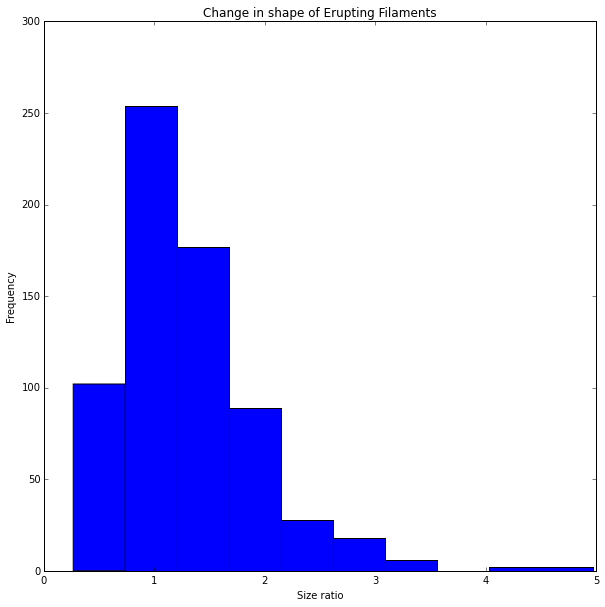

In [142]:
plt.xlabel('Size ratio')
plt.ylabel('Number of Instances')
plt.title('Change in shape of Erupting Filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
all_tracks_trans['L_to_W'].plot.hist()
plt.tight_layout()
plt.show()

#Number of Barbs

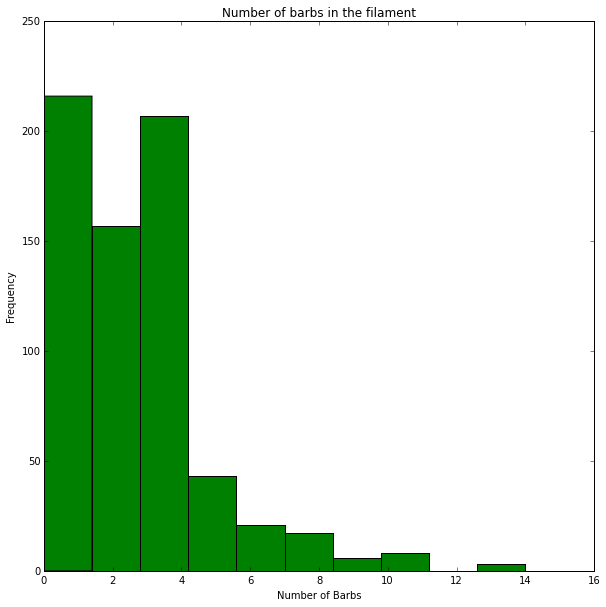

In [143]:
#barbs = all_tracks_trans['fi_barbstot']
plt.xlabel('Number of Barbs')
plt.ylabel('Number of Instances')
plt.title('Number of barbs in the filament')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
#plt.hist(barbs)
plt.tight_layout()
all_tracks_trans['fi_barbstot'].plot(kind='hist', rwidth=1.5, color = 'g')

In [144]:
grouped_filaments = all_tracks_trans.groupby('Track No.')
avg_barbs = []
barb_slope = []
barbs_stdev = []
barbs_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    barbstot = group['fi_barbstot']
    fit = np.polyfit(t_delt, barbstot,1)
    barb_slope = barb_slope + [fit]*len(barbstot) 
    avg_barbs.extend([barbstot.mean()]*len(barbstot))
    barbs_stdev.extend([np.std(barbstot)]*len(barbstot))
    barbs_skew.extend([stats.skew(barbstot)]*len(barbstot))
    #plot_slopes(t_delt,barbstot,fit[0],fit[1])
    
barb_slopes_only = [item[0] for item in barb_slope]

In [145]:
print len(avg_barbs)
print len(barb_slope)
all_tracks_trans['avg_barbs'] = avg_barbs
all_tracks_trans['barb_slope'] = barb_slopes_only
all_tracks_trans['barb_stdev'] = barbs_stdev
all_tracks_trans['barb_skew'] = barbs_skew
all_tracks_trans.head()

678
678


,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,area_stdev,area_skew,avg_L_to_W,L_to_W_slope,L_to_W_stdev,L_to_W_skew,avg_barbs,barb_slope,barb_stdev,barb_skew
149,64,19229714400,2012-01-06 18:05:45,0,70.7404,7662.162092,3,-879.333984,299.819000,0.517512,...,2693.587062,-0.274744,0.576863,4.390244e-07,0.081144,0.650061,3.166667,-0.000006,1.57233,0.49546
150,64,22673801200,2012-01-07 09:33:12,-1,76.3383,5797.861380,6,-809.905029,300.821991,0.522808,...,2693.587062,-0.274744,0.576863,4.390244e-07,0.081144,0.650061,3.166667,-0.000006,1.57233,0.49546
151,64,21741021200,2012-01-08 08:28:28,0,67.0859,6053.765348,3,-649.929016,324.964996,0.547443,...,2693.587062,-0.274744,0.576863,4.390244e-07,0.081144,0.650061,3.166667,-0.000006,1.57233,0.49546
152,64,18870927400,2012-01-09 11:08:54,-1,73.8154,4029.099151,2,-455.740997,328.979004,0.495933,...,2693.587062,-0.274744,0.576863,4.390244e-07,0.081144,0.650061,3.166667,-0.000006,1.57233,0.49546
153,64,12987221000,2012-01-10 18:23:00,0,-53.1533,954.909216,4,125.750999,465.782990,0.706247,...,2693.587062,-0.274744,0.576863,4.390244e-07,0.081144,0.650061,3.166667,-0.000006,1.57233,0.49546


In [146]:
print min(barb_slopes_only)*10e5
print max(barb_slopes_only)*10e5
print min(avg_barbs)
print max(avg_barbs)

-44.1258521214
17.5664355701
1.0
5.57142857143


#Find the Change in Tilt for each Filament

In [147]:
print min(all_tracks_trans['fi_tilt'])
print max(all_tracks_trans['fi_tilt'])

-89.3886
89.6945


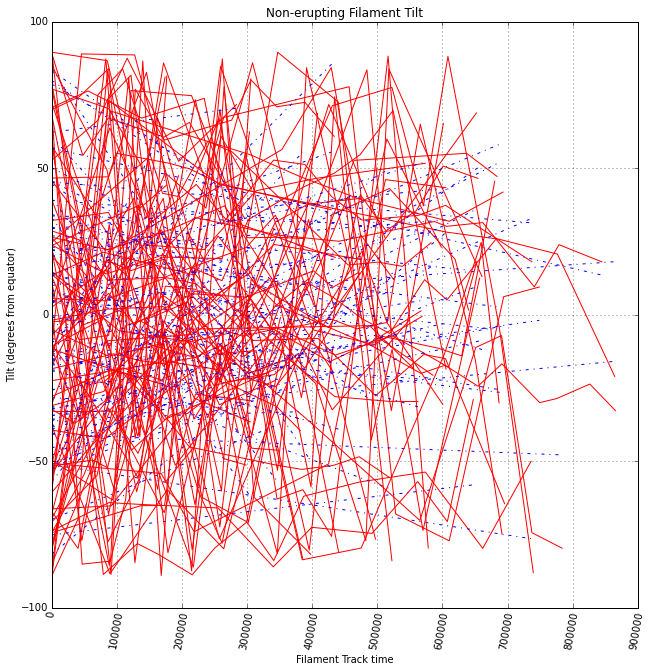

In [148]:
grouped_filaments = all_tracks_trans.groupby('Track No.')
tilt_slope = []
avg_tilt = []
tilt_stdev = []
tilt_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_tilt = group['fi_tilt']
    fit = np.polyfit(t_delt, f_tilt,1)
    tilt_slope = tilt_slope + [fit]*len(f_tilt)  
    avg_tilt.extend([f_tilt.mean()]*len(f_tilt))
    tilt_stdev.extend([np.std(f_tilt)]*len(f_tilt))
    tilt_skew.extend([stats.skew(f_tilt)]*len(f_tilt))
    plot_slopes(t_delt,f_tilt,fit[0],fit[1],'Non-erupting Filament Tilt','Tilt (degrees from equator)')
       
tilt_slopes_only = [item[0] for item in tilt_slope]

In [149]:
all_tracks_trans['avg_tilt'] = avg_tilt
all_tracks_trans['tilt_slope'] = tilt_slopes_only
all_tracks_trans['tilt_stdev'] = tilt_stdev
all_tracks_trans['tilt_skew'] = tilt_skew
all_tracks_trans.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,L_to_W_stdev,L_to_W_skew,avg_barbs,barb_slope,barb_stdev,barb_skew,avg_tilt,tilt_slope,tilt_stdev,tilt_skew
149,64,19229714400,2012-01-06 18:05:45,0,70.7404,7662.162092,3,-879.333984,299.819000,0.517512,...,0.081144,0.650061,3.166667,-0.000006,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127
150,64,22673801200,2012-01-07 09:33:12,-1,76.3383,5797.861380,6,-809.905029,300.821991,0.522808,...,0.081144,0.650061,3.166667,-0.000006,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127
151,64,21741021200,2012-01-08 08:28:28,0,67.0859,6053.765348,3,-649.929016,324.964996,0.547443,...,0.081144,0.650061,3.166667,-0.000006,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127
152,64,18870927400,2012-01-09 11:08:54,-1,73.8154,4029.099151,2,-455.740997,328.979004,0.495933,...,0.081144,0.650061,3.166667,-0.000006,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127
153,64,12987221000,2012-01-10 18:23:00,0,-53.1533,954.909216,4,125.750999,465.782990,0.706247,...,0.081144,0.650061,3.166667,-0.000006,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127


308
370


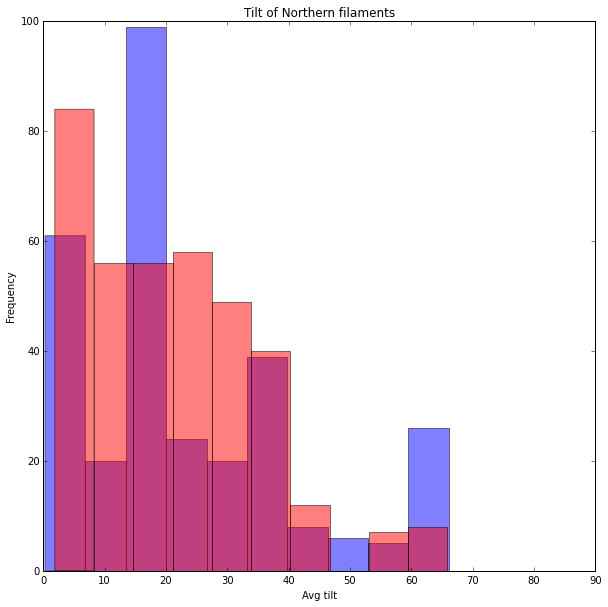

In [150]:
north_filaments = all_tracks_trans[all_tracks_trans['ycen']>=0]
south_filaments = all_tracks_trans[all_tracks_trans['ycen']<0]
print len(north_filaments)
print len(south_filaments)
#barbs = all_tracks_trans['fi_barbstot']
plt.xlabel('Avg tilt')
plt.ylabel('Number of Instances')
plt.xlim([0,90])
plt.title('Tilt of Northern filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
#plt.hist(barbs)
plt.tight_layout()
abs(north_filaments['avg_tilt']).plot(kind='hist', rwidth=1.5, color = 'b', alpha=0.5)
abs(south_filaments['avg_tilt']).plot(kind='hist', rwidth=1.5, color = 'r', alpha=0.5)

# Let's look at the Chirality

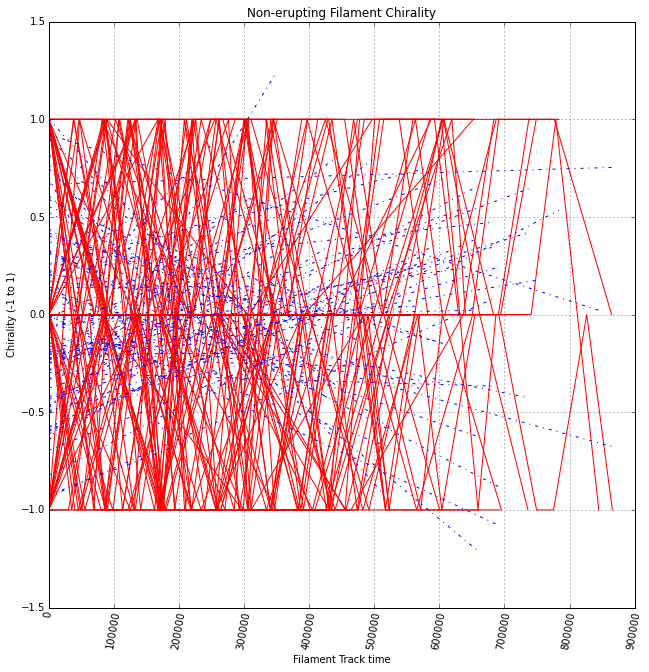

In [151]:
grouped_filaments = all_tracks_trans.groupby('Track No.')
chiral_slope = []
avg_chiral = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_chiral = group['fi_chirality']
    fit = np.polyfit(t_delt, f_chiral,1)
    chiral_slope = chiral_slope + [fit]*len(f_chiral)  
    avg_chiral.extend([f_chiral.mean()]*len(f_chiral))
    plot_slopes(t_delt,f_chiral,fit[0],fit[1],'Non-erupting Filament Chirality','Chirality (-1 to 1)')
       
chiral_slopes_only = [item[0] for item in chiral_slope]

In [152]:
all_tracks_trans['avg_chirality'] = avg_chiral
all_tracks_trans['chirality_slope'] = chiral_slopes_only
all_tracks_trans.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,avg_barbs,barb_slope,barb_stdev,barb_skew,avg_tilt,tilt_slope,tilt_stdev,tilt_skew,avg_chirality,chirality_slope
149,64,19229714400,2012-01-06 18:05:45,0,70.7404,7662.162092,3,-879.333984,299.819000,0.517512,...,3.166667,-0.000006,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127,-0.333333,7.995242e-07
150,64,22673801200,2012-01-07 09:33:12,-1,76.3383,5797.861380,6,-809.905029,300.821991,0.522808,...,3.166667,-0.000006,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127,-0.333333,7.995242e-07
151,64,21741021200,2012-01-08 08:28:28,0,67.0859,6053.765348,3,-649.929016,324.964996,0.547443,...,3.166667,-0.000006,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127,-0.333333,7.995242e-07
152,64,18870927400,2012-01-09 11:08:54,-1,73.8154,4029.099151,2,-455.740997,328.979004,0.495933,...,3.166667,-0.000006,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127,-0.333333,7.995242e-07
153,64,12987221000,2012-01-10 18:23:00,0,-53.1533,954.909216,4,125.750999,465.782990,0.706247,...,3.166667,-0.000006,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127,-0.333333,7.995242e-07


#Add the average X and Y locations to the mix

In [153]:
grouped_filaments = all_tracks_trans.groupby('Track No.')
avg_x = []
avg_y = []
for name, group in grouped_filaments:
    f_xloc = group['xcen']
    f_yloc = group['ycen'] 
    avg_x.extend([f_xloc.mean()]*len(f_xloc))
    avg_y.extend([f_yloc.mean()]*len(f_yloc))
all_tracks_trans['avg_xcen'] = avg_x
all_tracks_trans['avg_ycen'] = avg_y
all_tracks_trans.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,barb_stdev,barb_skew,avg_tilt,tilt_slope,tilt_stdev,tilt_skew,avg_chirality,chirality_slope,avg_xcen,avg_ycen
149,64,19229714400,2012-01-06 18:05:45,0,70.7404,7662.162092,3,-879.333984,299.819000,0.517512,...,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127,-0.333333,7.995242e-07,-393.722337,349.601664
150,64,22673801200,2012-01-07 09:33:12,-1,76.3383,5797.861380,6,-809.905029,300.821991,0.522808,...,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127,-0.333333,7.995242e-07,-393.722337,349.601664
151,64,21741021200,2012-01-08 08:28:28,0,67.0859,6053.765348,3,-649.929016,324.964996,0.547443,...,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127,-0.333333,7.995242e-07,-393.722337,349.601664
152,64,18870927400,2012-01-09 11:08:54,-1,73.8154,4029.099151,2,-455.740997,328.979004,0.495933,...,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127,-0.333333,7.995242e-07,-393.722337,349.601664
153,64,12987221000,2012-01-10 18:23:00,0,-53.1533,954.909216,4,125.750999,465.782990,0.706247,...,1.57233,0.49546,50.588583,-0.000149,46.496175,-1.77127,-0.333333,7.995242e-07,-393.722337,349.601664


In [154]:
all_tracks_trans.keys()

Index([u'Track No.', u'fi_length', u'HEK_time', u'fi_chirality', u'fi_tilt',
       u'area', u'fi_barbstot', u'xcen', u'ycen', u'L_to_W', u'time_delta',
       u'len_fits', u'len_slope', u'avg_len', u'len_stdev', u'len_skew',
       u'avg_area', u'area_fits', u'area_slope', u'area_stdev', u'area_skew',
       u'avg_L_to_W', u'L_to_W_slope', u'L_to_W_stdev', u'L_to_W_skew',
       u'avg_barbs', u'barb_slope', u'barb_stdev', u'barb_skew', u'avg_tilt',
       u'tilt_slope', u'tilt_stdev', u'tilt_skew', u'avg_chirality',
       u'chirality_slope', u'avg_xcen', u'avg_ycen'],
      dtype='object')

In [155]:
short_list = grouped_filaments.first()
short_list.reset_index(inplace=1) #Inplace keeps Track No. as a column, rather than setting it as an index
short_list.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,barb_stdev,barb_skew,avg_tilt,tilt_slope,tilt_stdev,tilt_skew,avg_chirality,chirality_slope,avg_xcen,avg_ycen
0,64,19229714400,2012-01-06 18:05:45,0,70.7404,7662.162092,3,-879.333984,299.819000,0.517512,...,1.572330,0.495460,50.588583,-0.000149,46.496175,-1.771270,-0.333333,7.995242e-07,-393.722337,349.601664
1,78,3444121090,2012-01-08 08:28:28,0,-33.1219,416.504564,3,-180.089005,648.922974,1.096153,...,2.446298,1.355221,-34.326525,0.000007,6.119652,-0.277828,0.250000,-6.091647e-07,252.118356,610.773743
2,98,6242473000,2012-01-10 11:15:10,0,72.2440,1503.453464,3,-536.208984,708.239014,0.818182,...,0.962091,0.566947,2.635210,-0.000023,32.689339,0.419343,0.000000,1.058229e-06,-113.610078,752.170366
3,106,3587629570,2012-01-10 18:23:00,0,-74.4393,372.922622,2,-862.151001,316.893005,0.606061,...,1.749636,0.599308,-23.465964,0.000021,36.431093,1.476287,-0.357143,-9.028312e-07,-6.701898,401.333001
4,135,10117125100,2012-01-13 18:23:37,-1,-85.0808,835.819006,3,-765.479980,-214.253998,0.353743,...,1.343710,0.519038,-32.827512,0.000070,35.771863,-0.626612,-0.166667,1.886340e-06,-174.864097,-272.210165


In [156]:
short_list.to_csv('Non_Eruption_Analysis_Updated.csv', columns = ('Track No.', 'avg_len', 'len_slope', 'len_stdev','len_skew','avg_area', 'area_slope', 'avg_chirality','area_stdev','area_skew', 'chirality_slope', 'avg_barbs', 'barb_slope','barb_stdev','barb_skew','avg_tilt', 'tilt_slope','tilt_stdev','tilt_skew','avg_xcen','avg_ycen','avg_L_to_W','L_to_W_slope','L_to_W_stdev','L_to_W_skew'))

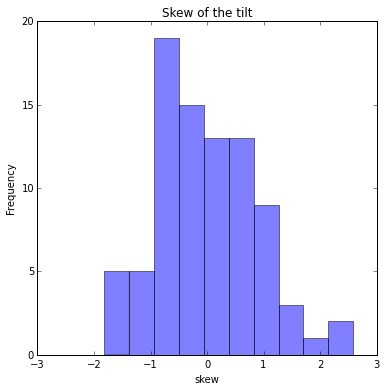

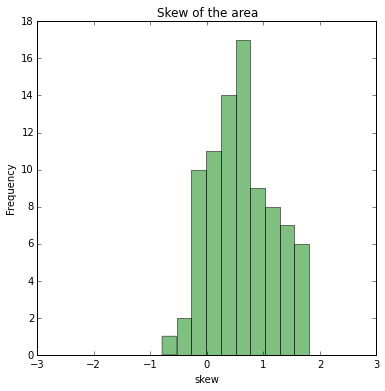

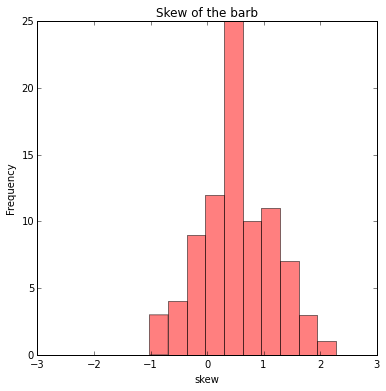

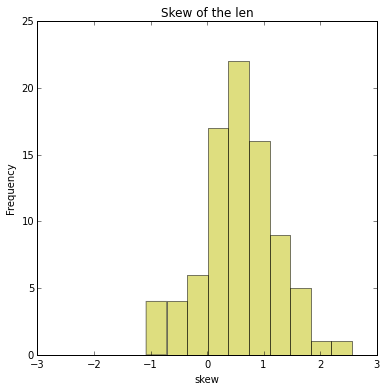

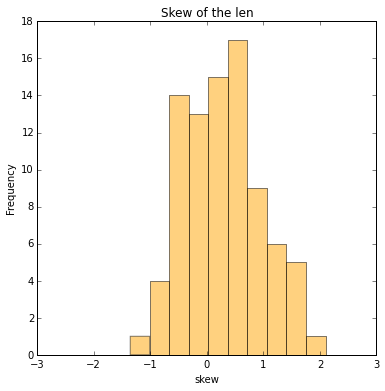

In [157]:
def plot_skew(param_list, color, param):
    plt.xlabel('skew')
    plt.ylabel('Number of Instances')
    plt.xlim([-3,3])
    plt.title('Skew of the %s' % param)
    fig1 = plt.gcf()
    fig1.set_size_inches(5.5,5.5)
    plt.tight_layout()
    param_list.plot(kind='hist',rwidth=1.5, color = color, alpha=0.5)
    plt.show()


plot_skew(short_list['tilt_skew'],color='b', param='tilt')
plot_skew(short_list['area_skew'],color='g', param='area')
plot_skew(short_list['barb_skew'],color='r', param='barb')
plot_skew(short_list['len_skew'],color='y', param='len')
plot_skew(short_list['L_to_W_skew'],color='orange', param='len')

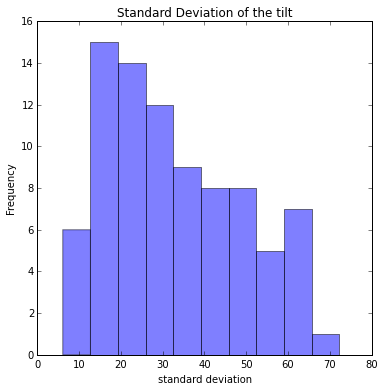

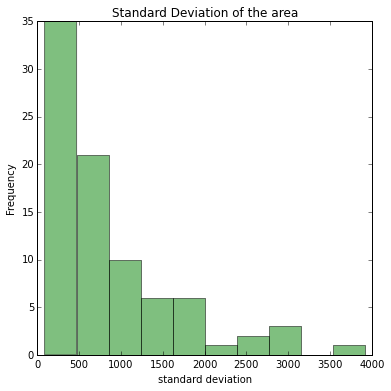

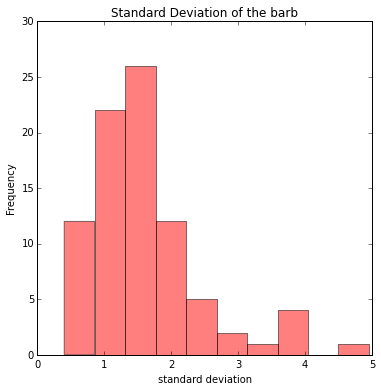

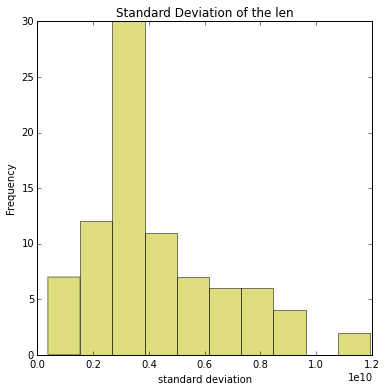

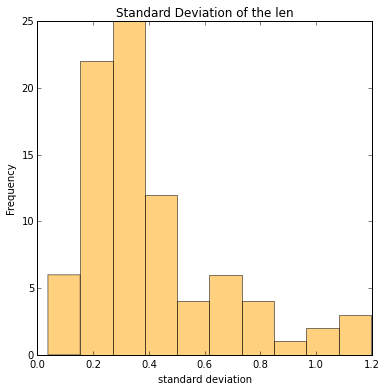

In [158]:
def plot_stdev(param_list, color, param):
    plt.xlabel('standard deviation')
    plt.ylabel('Number of Instances')
    #plt.xlim([-3,3])
    plt.title('Standard Deviation of the %s' % param)
    fig1 = plt.gcf()
    fig1.set_size_inches(5.5,5.5)
    plt.tight_layout()
    param_list.plot(kind='hist',rwidth=1.5, color = color, alpha=0.5)
    plt.show()


plot_stdev(short_list['tilt_stdev'],color='b', param='tilt')
plot_stdev(short_list['area_stdev'],color='g', param='area')
plot_stdev(short_list['barb_stdev'],color='r', param='barb')
plot_stdev(short_list['len_stdev'],color='y', param='len')
plot_stdev(short_list['L_to_W_stdev'],color='orange', param='len')

#CURRENT RESULTS FOR HACK WEEK

In [159]:
url = 'Non_Eruption_Analysis.csv'
non_erupting = pd.read_csv(url)
non_erupting = non_erupting.drop('Unnamed: 0', axis=1)
non_erupting.replace('Na',np.nan, inplace=True)
non_erupting['Eruption'] = 0
non_erupting.head()
#non_erupting.keys()


/Applications/anaconda/lib/python2.7/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,Track No.,fi_length_avg,length_slp,fi_area_avg,area_slp,fi_chiral_avg,chiral_slp,fi_tilt_avg,tilt_slp,Eruption
0,64,1.910054e+10,-20851.523458,4899.559437,-0.017645,0.400000,-0.259382,46.965340,-3.110127,0
1,78,9.040830e+09,19070.132868,1100.649604,0.001371,-0.333333,-0.836622,-33.939233,0.316939,0
2,98,6.642232e+09,5826.291102,1461.183990,-0.000051,0.285714,0.864459,2.343557,-1.330016,0
3,106,1.047587e+10,19895.431452,1288.497093,0.003803,0.222222,0.832329,-21.837421,0.671030,0
4,135,4.836125e+09,-14971.593714,353.247685,-0.001294,-0.200000,2.301987,-37.236174,0.481864,0


In [160]:
url = 'Eruption_Analysis.csv'

erupting = pd.read_csv(url)
erupting = erupting.drop('Unnamed: 0', axis=1)
erupting.replace('Na',np.nan, inplace=True)
erupting = erupting.astype(float)
erupting['Eruption'] = 1
erupting = erupting.dropna()
erupting.head()

,Track No.,fi_length_avg,length_slp,fi_area_avg,area_slp,fi_chiral_avg,chiral_slp,fi_tilt_avg,tilt_slp,Eruption
1,21,4.843297e+09,14271.123747,476.062630,-0.002162,0.000000,0.000000,-55.760900,-6.176173,1
3,93,1.140865e+10,5635.917614,4542.134217,-0.004866,0.000000,4.706329,-9.283704,-4.488977,1
4,94,2.242780e+10,-26760.784806,5584.925487,-0.007008,-0.142857,-3.257830,33.833814,-0.721631,1
5,140,1.219793e+10,100417.840826,3487.984499,0.029020,0.250000,0.242555,17.280300,4.510884,1
6,175,1.381954e+10,12941.709122,5210.939558,0.007604,0.400000,-1.354914,-22.194140,-0.169296,1


In [161]:
##Now lets see if we can predict whether a filament will erupt or not. 
erupting = erupting.astype(float)
all_eruptions=erupting.append(non_erupting,ignore_index = True)   #adding everything together
all_eruptions = all_eruptions.dropna() #for now, dropping everything with NaN
all_eruptions.head()

,Track No.,fi_length_avg,length_slp,fi_area_avg,area_slp,fi_chiral_avg,chiral_slp,fi_tilt_avg,tilt_slp,Eruption
0,21,4.843297e+09,14271.123747,476.062630,-0.002162,0.000000,0.000000,-55.760900,-6.176173,1
1,93,1.140865e+10,5635.917614,4542.134217,-0.004866,0.000000,4.706329,-9.283704,-4.488977,1
2,94,2.242780e+10,-26760.784806,5584.925487,-0.007008,-0.142857,-3.257830,33.833814,-0.721631,1
3,140,1.219793e+10,100417.840826,3487.984499,0.029020,0.250000,0.242555,17.280300,4.510884,1
4,175,1.381954e+10,12941.709122,5210.939558,0.007604,0.400000,-1.354914,-22.194140,-0.169296,1


In [162]:
#Pull out the feature we want to predict (1 for eruption, 0 for no eruption)
Y = np.array(all_eruptions['Eruption'])  #getting the eruption status (variable that is trying to be predicted)

In [163]:
all_eruptions.to_csv('All_Eruption_Analysis.csv', columns = ('Track No.', 'fi_length_avg', 'length_slp', 'fi_area_avg', 'area_slp', 'fi_chiral_avg', 'chiral_slp', 'fi_tilt_avg', 'tilt_slp','Eruption'))
all_eruptions = all_eruptions.drop('Eruption',1)  #now dropping the eruption column! 
X = all_eruptions.as_matrix()
print X

[[  2.10000000e+01   4.84329692e+09   1.42711237e+04 ...,   0.00000000e+00
   -5.57609000e+01  -6.17617259e+00]
 [  9.30000000e+01   1.14086501e+10   5.63591761e+03 ...,   4.70632930e+00
   -9.28370400e+00  -4.48897738e+00]
 [  9.40000000e+01   2.24278048e+10  -2.67607848e+04 ...,  -3.25783011e+00
    3.38338143e+01  -7.21630702e-01]
 ..., 
 [  3.20600000e+03   1.60905280e+10   5.88893952e+04 ...,  -5.78335796e+00
   -5.52171750e+01   1.54167976e+00]
 [  3.21400000e+03   3.80288667e+09   1.22756346e+04 ...,   4.68376818e+00
    5.12343750e+01   1.70282370e+00]
 [  3.23200000e+03   3.80288486e+09  -2.78869390e+03 ...,   7.78335829e+00
   -1.17732250e+01   8.41856134e-01]]


In [164]:
#Let's start by making 40 different 'forests' (based on decision trees)
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

n_trees = range(1,41)
scores = []
#This will make 40 forests, and each forest will be made up of 1-40 trees successively
#This way, we can see how much of an effect adding more trees has on the predictions.
for i in n_trees:
    forest = sklearn.ensemble.RandomForestClassifier(n_estimators = i)
    val_score = cross_val_score(forest, X=X, y=Y, cv=10)
    scores.append(val_score) 

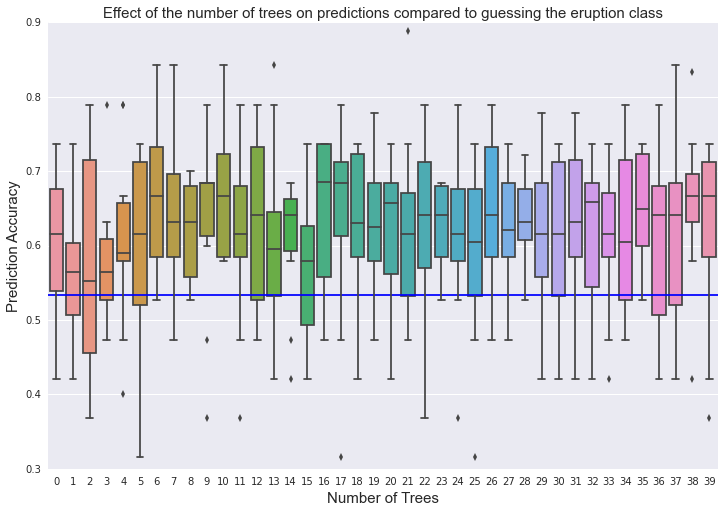

In [165]:
import seaborn as sns
non_erupt = 0.
for eruption in Y:
    if eruption == 0:
        non_erupt = non_erupt+1.
avg = non_erupt/len(Y)

plt.figure(figsize=(12,8))
plt.axhline(y=avg)
plt.title('Effect of the number of trees on predictions compared to guessing the eruption class', fontsize=15)
plt.xlabel('Number of Trees', fontsize=15)
plt.ylabel('Prediction Accuracy', fontsize=15)
sns.boxplot(data=scores)
#sns.boxplot(scores)

In [166]:
feature_forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 15)
#by_feature = feature_forest.feature_importances_
fitted_forest4a = forest.fit(X, Y)
val_score_ = cross_val_score(fitted_forest4a, X=X, y=Y, cv=10)
imp_features = fitted_forest4a.feature_importances_

print imp_features

[ 0.10318186  0.08452894  0.14746181  0.08326207  0.16883673  0.07574842
  0.10071425  0.11561044  0.12065548]


[ 0.09531833  0.12635418  0.16985163  0.09237894  0.14517825  0.05848958
  0.09318489  0.09839393  0.12085026]
Index([u'Track No.', u'fi_length_avg', u'length_slp', u'fi_area_avg',
       u'area_slp', u'fi_chiral_avg', u'chiral_slp', u'fi_tilt_avg',
       u'tilt_slp'],
      dtype='object')


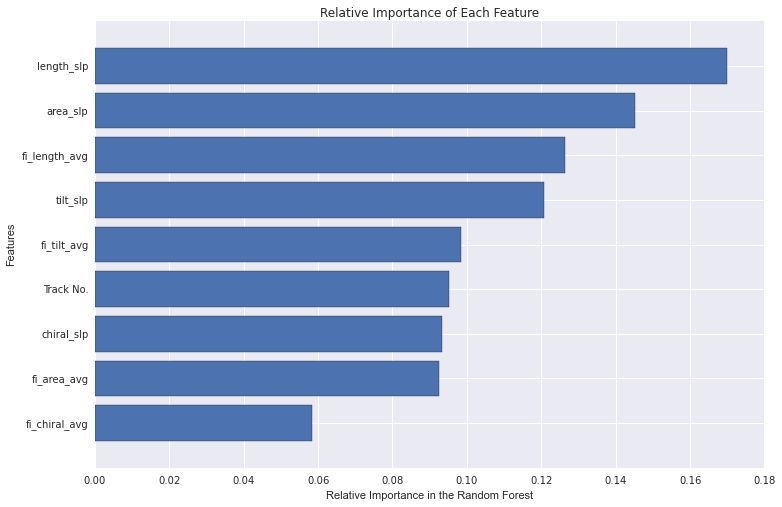

In [167]:
#Whitch features are most useful for prediction?

plt.figure(figsize=(12,8))
clf = RandomForestClassifier(n_estimators=15)

clf.fit(X,Y)
importance_list = clf.feature_importances_
name_list = all_eruptions.columns
print importance_list
print name_list
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative Importance of Each Feature')
plt.show()

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


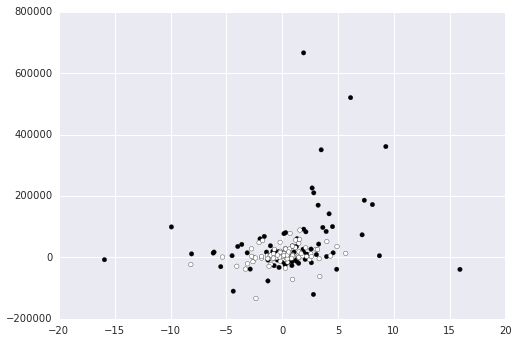

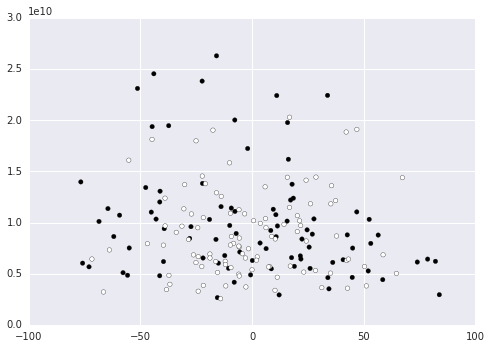

In [168]:
colors = Y
plt.scatter(all_eruptions['tilt_slp'],all_eruptions['length_slp'], c=colors)
plt.show()
plt.scatter(all_eruptions['fi_tilt_avg'],all_eruptions['fi_length_avg'], c=colors)
plt.show()

In [170]:
print len(short_list)

85
